## PCA

In [4]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import data_processing
import feature_extraction

Load the data

In [3]:
feature_df = pd.read_csv("mode_classification_features.csv") 

Train/Test

In [5]:
X = feature_df.drop(columns=['trajectory', 'label'])  # Drop irrelevant columns and the target.
Y = feature_df['label']  # Target variable

Standardize the data to have mean=0 and variance=1

In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 0.88846659, -0.49121382,  0.42074282, ...,  1.85625481,
        -0.68378789, -1.33517269],
       [ 0.56079111, -0.17038642,  0.4567618 , ..., -0.75119209,
        -0.51501402, -1.70658742],
       [ 1.05230433,  1.04364152,  1.23177059, ..., -0.77848899,
        -0.6753492 , -2.44886362],
       ...,
       [-1.07758626, -0.35478223, -0.21103938, ..., -0.62468415,
        -0.35467885,  0.04091012],
       [-0.25839757, -0.30575213, -0.21055716, ..., -0.2797309 ,
        -0.16480824,  0.55862311],
       [-1.07758626, -0.05740401, -0.01078411, ..., -0.29047097,
        -0.29560799, -1.29519819]])

Perform PCA

In [7]:
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Explained variance ratio for each principal component
explained_variance = pca.explained_variance_ratio_

# Cumulative explained variance
cumulative_variance = np.cumsum(explained_variance)

# Plot cumulative explained variance

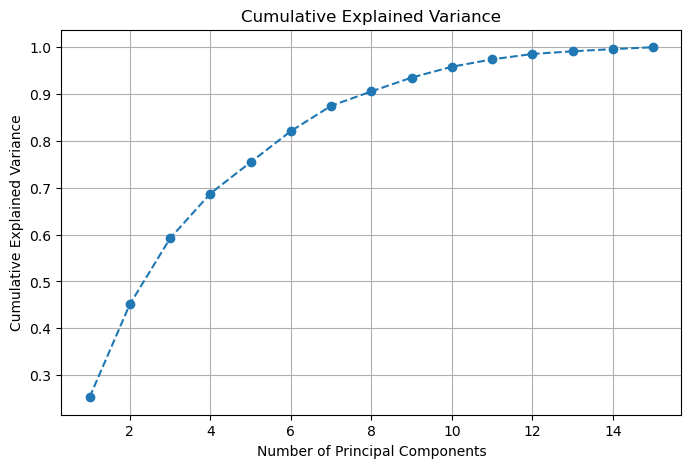

In [8]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title("Cumulative Explained Variance")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid()
plt.show()

Get the Principal Components

In [9]:
loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f'PC{i+1}' for i in range(len(pca.components_))],
    index=X.columns
)

# Sort features by their absolute contribution to the first principal component (PC1)
important_features = loadings['PC1'].abs().sort_values(ascending=False)
print("Features contributing most to PC1:\n", important_features)

Features contributing most to PC1:
 max_speed               0.397673
acceleration_std        0.387078
speed_std               0.382596
average_acceleration    0.322103
average_speed           0.307380
trajectory_length       0.301282
bearing_changes         0.252437
duration                0.227161
VCR                     0.215216
VC                      0.181727
stops                   0.174418
HCR                     0.147009
SR                      0.084784
total_distance          0.050290
start_time              0.014929
Name: PC1, dtype: float64
